<a href="https://colab.research.google.com/github/ArashVafa/ISTM660/blob/master/Copy_of_Stock_Market_Example_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1),
                          end=datetime.datetime(2012, 1, 1))

In [0]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.305108
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.208156
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.369746
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.301377
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.225556


In [0]:
startyear = int(input('Please Enter start year: '))
startmonth = int(input('Please Enter start month: '))
startday = int(input('Please Enter start day: '))

endyear = int(input('Please Enter end year: '))
endmonth = int(input('Please Enter end month: '))
endday = int(input('Please Enter end day: '))


Please Enter start year: 2018
Please Enter start month: 7
Please Enter start day: 14
Please Enter end year: 2019
Please Enter end month: 7
Please Enter end day: 14


In [0]:
article = pd.read_html('http://eoddata.com/symbols.aspx',header=0)
df = article[4]

df.head()

,Code,Name,High,Low,Close,Volume,Change,Change.1,Change.2,Unnamed: 9
0,A,Agilent Technologies,78.97,77.31,78.30,2137398,-0.2200,NaN,0.28,NaN
1,AA,Alcoa Corp,20.70,20.11,20.15,2489700,-0.2200,NaN,1.08,NaN
2,AAC,Aac Holdings Inc,0.49,0.46,0.48,98700,0.0135,NaN,2.89,NaN
3,AAN,Aaron's Inc,57.99,56.65,56.74,520100,-0.8800,NaN,1.53,NaN
4,AAP,Advance Auto Parts Inc,163.20,158.20,158.30,635800,-3.4000,NaN,2.11,NaN


In [0]:
aapl = pdr.get_data_yahoo('NSRGF', 
                          start=datetime.datetime(startyear, startmonth, startday),
                          end=datetime.datetime(endyear, endmonth, endday))

aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-08,104.150002,103.550003,103.730003,103.879997,43700.0,103.879997
2019-07-09,103.940002,103.330002,103.449997,103.550003,4500.0,103.550003
2019-07-10,104.160004,103.559998,104.000000,103.769997,7700.0,103.769997
2019-07-11,103.790001,102.650002,103.790001,102.690002,2400.0,102.690002
2019-07-12,103.980003,102.199997,103.099998,102.199997,3900.0,102.199997


In [0]:
!pip install quandl

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 2.3MB 8.3MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6076 sha256=3f8e0bc29fe44982807120ffaa888690db392f376d813a4cd0ad298b97446aeb
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [0]:
aapl['diff'] = aapl.Open - aapl.Close

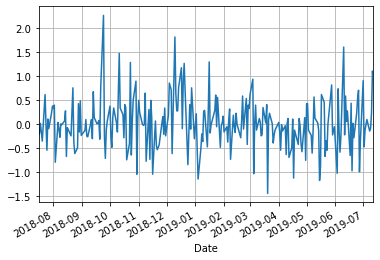

In [0]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['diff'].plot(grid=True)

# Show the plot
plt.show()

In [0]:
# Import `numpy` as `np`
import numpy as np

daily_close = aapl[['Close']]
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

               Close
Date                
2018-07-16       NaN
2018-07-17 -0.004518
2018-07-18 -0.001133
2018-07-19  0.011768
2018-07-20  0.010400
...              ...
2019-07-08  0.009868
2019-07-09 -0.003182
2019-07-10  0.002122
2019-07-11 -0.010462
2019-07-12 -0.004783

[250 rows x 1 columns]


In [0]:
year = int(input('From how many years ago you want the analysis? '))

From how many years ago you want the analysis? 3


In [0]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

now = datetime.datetime.now()
past = datetime.datetime.now() - datetime.timedelta(days=year*365)

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, past, now)

all_data.tail()

High          Low  ...     Volume    Adj Close
Ticker Date                                  ...                        
GOOG   2019-11-15  1334.880005  1314.280029  ...  1782600.0  1334.869995
       2019-11-18  1335.529053  1317.500000  ...  1487400.0  1320.699951
       2019-11-19  1327.699951  1312.800049  ...  1269200.0  1315.459961
       2019-11-20  1315.000000  1291.150024  ...  1308600.0  1303.050049
       2019-11-21  1312.449951  1293.010010  ...   825205.0  1301.349976

[5 rows x 6 columns]

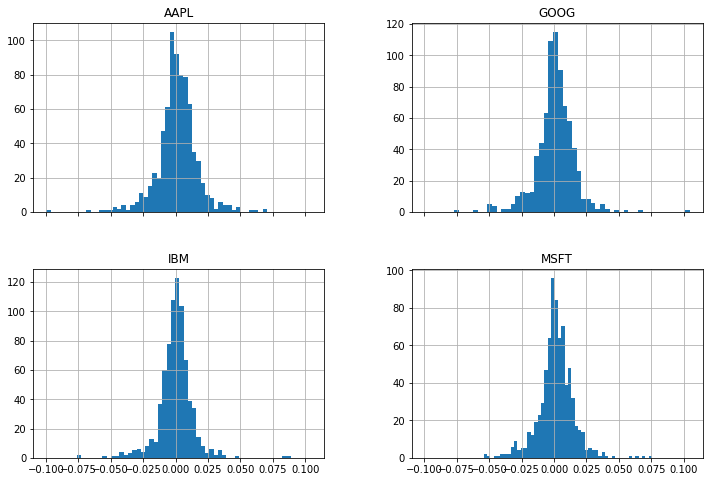

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

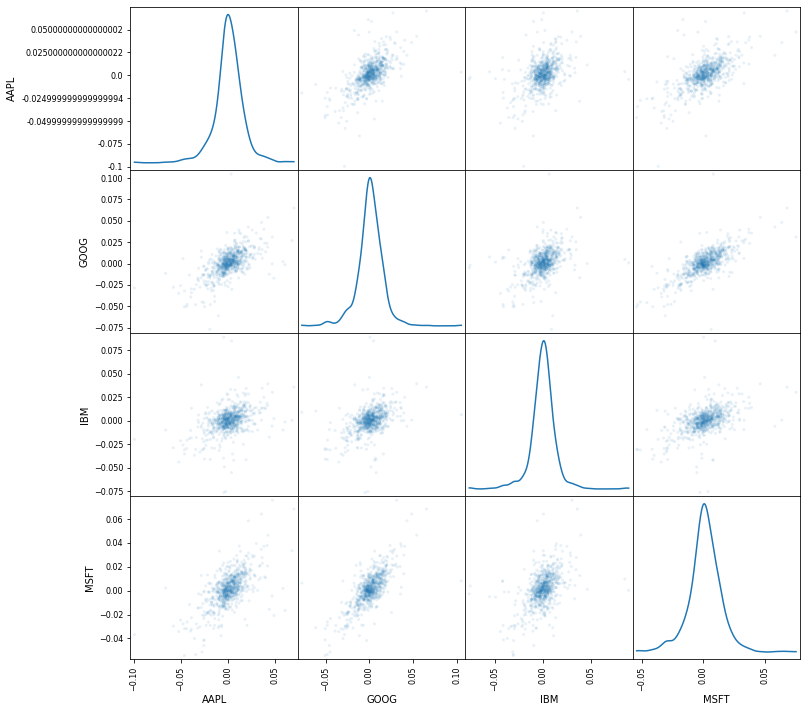

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()



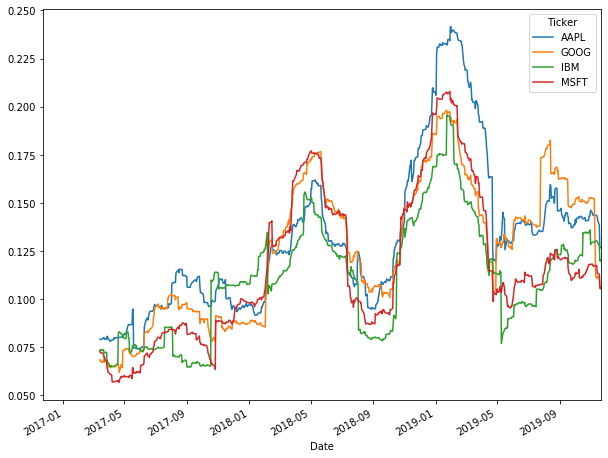

In [0]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

Let's develop a simple strategy: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

Remember that when you go long, you think that the stock price will go up and will sell at a higher price in the future (= buy signal); When you go short, you sell your stock, expecting that you can buy it back at a lower price and realize a profit (= sell signal).

This simple strategy might seem quite complex when you’re just starting out, but let’s take this step by step:



* First define your two different lookback periods: a short window and a long window. You set up two variables and assign one integer per variable. Make sure that the integer that you assign to the short window is shorter than the integer that you assign to the long window variable!

* Next, make an empty signals DataFrame, but do make sure to copy the index of your aapl data so that you can start calculating the daily buy or sell signal for your aapl data.
Create a column in your empty signals DataFrame that is named signal and initialize it by setting the value for all rows in this column to 0.0.

* After the preparatory work, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the rolling() function to start your rolling window calculations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a rolling() function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and False, so that the labels are not set at the center of the window. Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.

* After you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is signals['signal'][short_window], because you only want to create signals for the period greater than the shortest moving average window!

* Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.


In [0]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2018-07-16     0.0   79.860001  79.860001        NaN
2018-07-17     0.0   79.680000  79.680000        0.0
2018-07-18     0.0   79.590001  79.590001        0.0
2018-07-19     0.0   79.780001  79.780001        0.0
2018-07-20     0.0   80.062001  80.062001        0.0
...            ...         ...        ...        ...
2019-07-08     1.0  100.815751  96.523100        0.0
2019-07-09     1.0  101.002501  96.701600        0.0
2019-07-10     1.0  101.184001  96.861900        0.0
2019-07-11     1.0  101.327501  97.011300        0.0
2019-07-12     1.0  101.437251  97.140200        0.0

[250 rows x 4 columns]


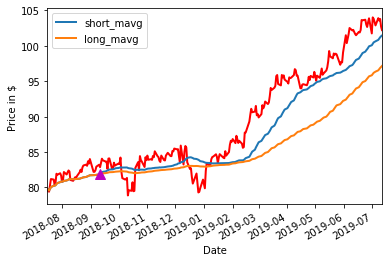

In [0]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [0]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2018-07-16   0.0       0.0  100000.0  100000.0      NaN
2018-07-17   0.0       0.0  100000.0  100000.0      0.0
2018-07-18   0.0       0.0  100000.0  100000.0      0.0
2018-07-19   0.0       0.0  100000.0  100000.0      0.0
2018-07-20   0.0       0.0  100000.0  100000.0      0.0


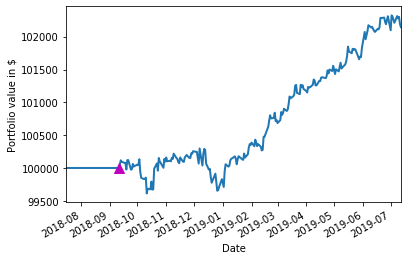

In [0]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

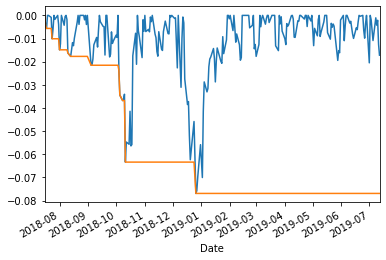

In [0]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()